## Transferencia de calor en un paralelepípedo 
ver informe

In [29]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import webbrowser

# valida si una entrada es un flotante
def isfloat(f):
    try:
        n = float(f)
        return True
    except:
        return False
    
# pedir paso. Valida paso con el modulo de 2%h
hinput = input("Ingrese h valido: ")
while(isfloat(hinput)==False or (2%float(hinput)!=0 or 2/float(hinput)<2)):
    hinput = input("Ingrese h valido: ")
h = float(hinput)

#determinamos los intervalos de cada eje, sumamos 1 para incluir el borde
x=int(2/h)+1
y=int(4/h)+1
z=int(2/h)+1

#Generación de nodos: 
N = np.zeros((y,x,z)) #matriz de nodos
nodo=0
# La distribución de nuestros nodos sigue esta estructura
# descartamos la ultima capa y donde T = 10° (y-1)
# La matriz N tiene los nodos asociados a cada punto i,j,k del vector de T°
for j in range(y):
    for k in range(z):
        for i in range(x):
            #("%i,%i,%i = %i"%(i,j,k,nodo))
            N[j][i][k] = nodo
            nodo+=1
print("Nodos del sistema: %i"%nodo)
if(nodo>500):
    print("Espere...")
# por comodidad, los valores de los nodos deben ser enteros(de float a enteros para no convertirlos despues)
N= np.int_(N)
#print(N)
#print("----------------------------------")

#se usa para cuando se quiere probar si un nodo esta fuera de la malla
#por lo general se da cuando se accede a un nodo +1 (i+1 o j+1 o k+1) o si los indices son negativos
def probarNodo(ecuacion,i,j,k,valor):
    if(i<0 or j<0 or k<0):
        return ecuacion
    else:
        try:
            ecuacion[ N[j][k][i]] += valor
        except:
            pass
    return ecuacion
    
# Matriz
M = np.zeros((nodo)) #matriz de nodos a resolver(A)
b = np.zeros((nodo)) #matriz de coeficientes (36)

# Crear ecuaciones en matriz tridimensional
n=0
ecuas = "Ecuaciones:\n"
for j in range(y):
    for i in range(x):
        for k in range(z):
            ecuacion = np.zeros((nodo))
            if(j == 0):
                #primera cara donde esta el flujo de calor constante
                ecuacion = probarNodo(ecuacion,i,j+1,k,1)
                if(h==1):
                    ecuacion =probarNodo(ecuacion,i,j,k,-1)#arreglin
                b[n] =0.5*h # -Q*h**2/0.5 -h ; Q=0 
            else:
                if(j<y-1):
                    ecuacion = probarNodo(ecuacion,i+1,j,k,1)
                    if(i-1>=0):
                        ecuacion = probarNodo(ecuacion,i-1,j,k,1)
                    ecuacion = probarNodo(ecuacion,i,j+1,k,1)
                    if(j-1>=0):
                        ecuacion = probarNodo(ecuacion,i,j-1,k,1)
                    ecuacion = probarNodo(ecuacion,i,j,k+1,1)
                    if(k-1>=0):
                        ecuacion = probarNodo(ecuacion,i,j,k-1,1)
                    ecuacion = probarNodo(ecuacion,i,j,k,-6)
                    if(j<y/2-1):
                        b[n] = 0 # Cara donde Q = 0
                    else:
                        b[n] = -(1*h**2)/0.5 # Cara donde Q = 1 -Qh**2/0.5
                else:
                    ecuacion = probarNodo(ecuacion,i,j,k,1) # últimos 9 nodos de la ultima
                    b[n] = 10 # Tijk = 10 

            # Si esta en la primera pasada, registra la ecuacion en M, SINO, concatena 
            # la ecuacion como una fila hacia abajo    
            if(n == 0):
                M = ecuacion
            else:
                M = np.vstack((M, ecuacion))
            n+=1

M = np.int_(M)

#resolver la ecuacion
solve = np.linalg.solve(M,b)
#solve =[round(x,3) for x in solve]

print("Resultados en el archivo Matriz.txt")
#guardamos en matriz.txt            
F = open("matriz.txt","w") 
F.write("\nMatriz|coeficientes\n")
for i in range(nodo):
    for j in range(nodo):
        if(M[i][j]>=0 and M[i][j]<10):
            F.write(" %s "%str(M[i][j]))
        else:
            F.write("%s "%str(M[i][j]))
    F.write(" = %f"%b[i])
    F.write("\n")
    
F.write("\nSoluciones:\n")
for s in range(nodo):
    F.write("T%i = %f\n"%(s+1,solve[s]))
F.close()

#abrir txt
webbrowser.open("matriz.txt")

#print("M:%s"%str(M))
#print("b:%s"%str(b))
#print("soluciones:%s"%str(solve))

Ingrese h valido: 1
Nodos del sistema: 45
Resultados en el archivo Matriz.txt


True

hmm no logramos el gráfico.

AttributeError: 'NoneType' object has no attribute 'autoscale_None'

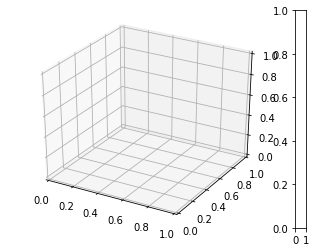

In [69]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#fig.colorbar(plt.hot(), ax=ax)
x=int(4/h)+1
x_= np.linspace(0,2,x)
print(x_)
y_ = solve[0:y]
print(y_)
ax.scatter(x_,x_,y_)
#print(np.size(y_))
for i in range(len(x_)):
    sup = i+y
    y_ = solve[sup:sup+y]
    print(y_)
    ax.scatter(x_,x_,y_)
plt.show()